<a id='top'></a>

# CSCI3022 F20
# Homework 1: Data Cleaning and Exploratory Data Analysis 
***

**Name**: Aanvi Guliani

***

This assignment is due on Canvas by **MIDNIGHT on Friday September 4**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 95 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4) |
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

[Back to top](#top)

<br>

<a/ id='p1'></a>

### (20 points) Problem 1: Theory (Sampling)
***

<img style="float: left; width: 200px; padding: 3mm;" src="https://upload.wikimedia.org/wikipedia/commons/5/57/Acme_ballot_box_-_Smithsonian.jpg" alt="A ballot box"/>  
You are the head of a news outlet on election day. You have embedded journalists in key U.S. States in order sample voters at different polling stations in the states. Once your journalists choose a polling station, they monitor the station for the election day. The journalists then report back the number of votes for each candidate, which is recorded in a special App on your phone, called Hippocampus. Overall, your team collected data from 6 polling stations in Alaska, 36 polling stations in Ohio, 12 polling stations in Colorado, 6 polling stations in Iowa, and 42 polling stations from California.

You want to get a sense of the average amount of votes for each candidate per polling station, so you use the Hippocampus app to randomly choose 1 polling station in Alaska, 6 polling stations in Ohio, 2 polling stations in Colorado, 1 polling station in Iowa, and 7 polling stations from California.

$$ \quad $$
    
**Part A:** Identify the following: 

- the population 
- the sample frame 
- the sample 
- the type of sample 
- the quantity of interest

**Population:** voters in key U.S. states  
**Sample Frame:** list of eligible voters in Alaska, Ohio, Colorado, Iowa, and California  
**Sample:** chosen polling stations (1 in Alaska, 6 in Ohio, 2 in Colorado, 1 in Iowa, and 7 in California   
**Type of Sample:** Cluster Sampling  
**Quantity of Interest:** the number of votes for each candidate

**Part B:** You repeat your sampling, again using the Hippocampus app. Now, you order the stations alphabetically by State and choose every 3rd data value. 
    
Identify the following: 

- the population 
- the sample frame 
- the sample 
- the type of sample 
- the quantity of interest

**Population:** voters in key U.S. states  
**Sample Frame:** list of eligible voters in Alaska, Ohio, Colorado, Iowa, and California  
**Sample:** chosen polling stations (1 in Alaska, 6 in Ohio, 2 in Colorado, 1 in Iowa, and 7 in California   
**Type of Sample:** Systematic Sampling  
**Quantity of Interest:** the number of votes for each candidate

[Back to top](#top)

<br>

<a/ id='p2'></a>

### (20 points) Problem 2: Theory and Computation (Means and Medians)
***

A method to investigate the sensitivity of the sample mean and sample median to extreme outliers and changes in the dataset is to replace one or more elements in a given dataset by a number $y$ and investigate the effect when $y$ changes. To illustrate this, consider the following dataset:
 
$$  4.2 \quad 5.1 \quad 5.0 \quad y \quad 3.8 \quad 4.1 \quad 5.5 \quad 1.9 $$




**Part A:** Compute the sample mean and sample median for $y=1.5$. Then compute both quantities again for $y=6$.

In [2]:
#Reference used for finding operators in python (floor value) https://www.w3schools.com/python/python_operators.asp
def calculateSampleMean(listNum):
    length = len(listNum)
    sumElements = 0
    for i in range(0,length):
        sumElements += listNum[i]
    sampleMean = sumElements / length
    return sampleMean
def calculateSampleMedian(listNum):
    listNum.sort()
    #print("sorted list ", listNum)
    length = len(listNum)
    sampleMedian = 0
    #case where even number of elements, take average of the two middle elements
    if length % 2 == 0:
        mid1 = listNum[(length//2)-1]
        mid2 = listNum[(length//2)]
        sampleMedian = (mid1+mid2) / 2
    else:
        #median element is the ceiling value of length / 2 (floor + 1)
        sampleMedian = listNum[(length//2)]
    return sampleMedian

#test cases: listA is when y = 1.5 and listB is when y=6
listA = [4.2,5.1,5.0,1.5,3.8,4.1,5.5,1.9]
listB = [4.2,5.1,5.0,6,3.8,4.1,5.5,1.9]
print("y = 1.5")
print("    sample mean: ", calculateSampleMean(listA))
print("    sample median: ", calculateSampleMedian(listA))

print("")

print("y = 6")
print("    sample mean: ", calculateSampleMean(listB))
print("    sample median: ", calculateSampleMedian(listB))

#testing median for odd number of elements
#listC = [4.2,5.1,5.0,3.8,4.1,5.5,1.9]
#print("sample median of C: ", calculateSampleMedian(listC))

y = 1.5
    sample mean:  3.8875
    sample median:  4.15

y = 6
    sample mean:  4.45
    sample median:  4.6


**Part B:** Is there a value for $y$ that would make the mean of the data equal to 6? If so, calculate the value of $y$ that makes the mean equal to 6. If not, clearly explain why not.
    
Is there a value for $y$ that would make the median of the data equal to 6? If so, calculate the values of $y$ that makes the median equal to 6. If not, clearly explain why not.

**Answer**  
Yes, by having a large enough value of y (outlier), it would pull the mean up to a 6. This would be possible when y=18.4. However, there is no value of y that would make the median equal to 6, because this would require 6 to be the middle number in the dataset, and currently the maximum value in the set is 5.5. No y value added would change the median to 6.

**Part C**: Compute the sample variance and the sample standard deviation for the original dataset given in part A, with $y=6$.

In [3]:
#sample mean helper function (copied from previous problem)
def calculateSampleMean(listNum):
    length = len(listNum)
    sumElements = 0
    for i in range(0,length):
        sumElements += listNum[i]
    sampleMean = sumElements / length
    return sampleMean

def calculateSampleStdDev(listNum):
    mean = calculateSampleMean(listNum)
    length = len(listNum)
    summation = 0
    for i in range(0,length):
        summation += ((listNum[i] - mean)**2)
    return (((summation)/(length-1))**.5)

def calculateSampleVariance(listNum):
    mean = calculateSampleMean(listNum)
    length = len(listNum)
    summation = 0
    for i in range(0,length):
        summation += ((listNum[i] - mean)**2)
    return (summation/(length-1))

#test
listA = [4.2,5.1,5.0,6,3.8,4.1,5.5,1.9]
print("y=6: ")
print("    sample standard deviation: ", calculateSampleStdDev(listA))
print("    sample variance: ", calculateSampleVariance(listA))

y=6: 
    sample standard deviation:  1.2727922061357855
    sample variance:  1.6199999999999999


**Part D**: Compute the sample median for the following cases: 
- $y=5$ 
- $y=50$ 
- $y=4.36$ 
- $y \to \infty$ 
- $y \to -\infty$

In [4]:
#Reference for infinity in python: https://www.geeksforgeeks.org/python-infinity/#:~:text=As%20of%202020%2C%20there%20is,to%20represent%20it%20as%20infinity.
import math
def calculateSampleMedian(listNum):
    listNum.sort()
    #print("sorted list ", listNum)
    length = len(listNum)
    sampleMedian = 0
    #case where even number of elements, take average of the two middle elements
    if length % 2 == 0:
        mid1 = listNum[(length//2)-1]
        mid2 = listNum[(length//2)]
        sampleMedian = (mid1+mid2) / 2
    else:
        #median element is the ceiling value of length / 2 (floor + 1)
        sampleMedian = listNum[(length//2)]
    return sampleMedian

#test cases: 
#y=5
listA = [4.2,5.1,5.0,3.8,4.1,5.5,1.9,5]
listB = [4.2,5.1,5.0,3.8,4.1,5.5,1.9,50]
listC = [4.2,5.1,5.0,3.8,4.1,5.5,1.9,4.36]
listD = [4.2,5.1,5.0,3.8,4.1,5.5,1.9,math.inf]
listE = [4.2,5.1,5.0,3.8,4.1,5.5,1.9,-math.inf]


print("y=5: ", calculateSampleMedian(listA))
print("y=50: ", calculateSampleMedian(listB))
print("y=4.36: ", calculateSampleMedian(listC))
print("y -> infinity: ", calculateSampleMedian(listD))
print("y -> -infinity: ", calculateSampleMedian(listE))

print("")
print("Note: As y approaches infinity, only the maximum value is changing, but it will still be the middle or middle two values. The median will remain the same, as long as the added value is greater than the current maximum in the list, whether that's infinity or just 0.1 greater than the max.")
print("")
print("It's similar as y approaches negative infinity. As long as y is less than the current minimum value in the list, the median will be the same value. In this case if y = -1 or y = -10 or y= -infinity, the median will be the same.")

y=5:  4.6
y=50:  4.6
y=4.36:  4.28
y -> infinity:  4.6
y -> -infinity:  4.15

Note: As y approaches infinity, only the maximum value is changing, but it will still be the middle or middle two values. The median will remain the same, as long as the added value is greater than the current maximum in the list, whether that's infinity or just 0.1 greater than the max.

It's similar as y approaches negative infinity. As long as y is less than the current minimum value in the list, the median will be the same value. In this case if y = -1 or y = -10 or y= -infinity, the median will be the same.


**Part E**: Think about the previous parts, above, and describe in words or mathematical notation the answers to the following two questions:

- By varying $y$, what is the set of all the possible values that the sample mean could take on?
- By varying $y$, what is the set of all the possible values that the sample median could take on? Specifically, for what sets of $y$ values does the median take on its different possible values?

**Answer**  
Based on my explanation above, these are the ranges for sample mean and median:  
  
The set of all possible values sample mean ($\bar{x}$) is in the following range:  
[$\bar{x}$ as y &#8594; $-\infty$ , $\bar{x}$ as y &#8594; $\infty$]  

The set of all possible values sample median is in the following range:  
[the median as y &#8594; $-\infty$ , the median as y &#8594; $\infty$]  


**Part F**: Describe in words or mathematical notation, what happens to the sample standard deviation when $y$ is varied in the following ways: 
 
- $y \to \infty$ 
- $y \to \bar{x}$

**Answer**  
As $y \to \infty$, the standard deviation increases, because there would be more variation and more spread out from the mean. However, as $y \to \bar{x}$, the standard deviation decreases, because variation would be less since it's closer to the mean.

[Back to top](#top)
<a/ id='p6'></a>

## (20 pts) Problem 3: Computation (Scaling)
***
Consider the following 3 data sets:

`A=[0,1,2,3,4,5,6,7,8,9,10,11,12]`

`B=[0,0,0,12,7,18,47,25,0,13,0,35]`

`C` is the random data set generated by using `np.random.exponential(scale=43, size=1000)`

For each data set, perform the following computations in parts A, B, and C:

**Part A:** Compute and print the mean and standard deviation of the data set.

In [5]:
def calculateSampleStdDev(listNum):
    mean = calculateSampleMean(listNum)
    length = len(listNum)
    summation = 0
    for i in range(0,length):
        summation += ((listNum[i] - mean)**2)
    return (((summation)/(length-1))**.5)

#print output
A=[0,1,2,3,4,5,6,7,8,9,10,11,12]
B=[0,0,0,12,7,18,47,25,0,13,0,35]
C = np.random.exponential(scale=43, size=1000)

#calculate values for mean and stdev
meanA = calculateSampleMean(A)
meanB = calculateSampleMean(B)
meanC = calculateSampleMean(C)
stdDevA = calculateSampleStdDev(A)
stdDevB = calculateSampleStdDev(B)
stdDevC = calculateSampleStdDev(C)

print("Sample Means: ")
print("    A: ", meanA)
print("    B: ", meanB)
print("    C: ", meanC)
print("")
print("Sample Standard Deviations:")
print("    A: ", stdDevA)
print("    B: ", stdDevB)
print("    C: ", stdDevC)

Sample Means: 
    A:  6.0
    B:  13.083333333333334
    C:  43.05762205711125

Sample Standard Deviations:
    A:  3.8944404818493075
    B:  15.64061341120571
    C:  43.45451799835244


**Part B:** Compute and print  the mean and standard deviation of the new data set formed by subtracting the original mean from each observation.

In [6]:
#Code here
def newListPartB(mean,listNum):
    length = len(listNum)
    for i in range(0,length):
        listNum[i] -= mean
    return listNum


newListA = newListPartB(meanA,A)
newListB = newListPartB(meanB,B)
newListC = newListPartB(meanC,C)

print("Sample Means: ")
print("    A: ", calculateSampleMean(newListA))
print("    B: ", calculateSampleMean(newListB))
print("    C: ", calculateSampleMean(newListC))
print("")
print("Sample Standard Deviations:")
print("    A: ", calculateSampleStdDev(newListA))
print("    B: ", calculateSampleStdDev(newListB))
print("    C: ", calculateSampleStdDev(newListC))


Sample Means: 
    A:  0.0
    B:  -1.1842378929335002e-15
    C:  -4.848388357459044e-14

Sample Standard Deviations:
    A:  3.8944404818493075
    B:  15.64061341120571
    C:  43.45451799835245


**Part C:** Compute and print  the mean and standard deviation of the new data set formed by subtracting the original mean from each observation and then dividing by the original standard deviation.

In [7]:
#Code here
def newListPartC(mean,stdev,listNum):
    length = len(listNum)
    for i in range(0,length):
        listNum[i] = (listNum[i]-mean)/stdev
    return listNum

newListA2 = newListPartC(meanA,stdDevA,A)
newListB2 = newListPartC(meanB,stdDevB,B)
newListC2 = newListPartC(meanC,stdDevC,C)

print("Sample Means: ")
print("    A: ", calculateSampleMean(newListA2))
print("    B: ", calculateSampleMean(newListB2))
print("    C: ", calculateSampleMean(newListC2))
print("")
print("Sample Standard Deviations:")
print("    A: ", calculateSampleStdDev(newListA2))
print("    B: ", calculateSampleStdDev(newListB2))
print("    C: ", calculateSampleStdDev(newListC2))

Sample Means: 
    A:  -1.5406577730392865
    B:  -0.836497456292845
    C:  -0.9908664056230898

Sample Standard Deviations:
    A:  1.0
    B:  1.0
    C:  1.0000000000000004


**Part D:** Why might this result matter?

**Answer**  
Subtracting the original mean from each element of the list and dividing each element by the original standard deviation (part D) would give us a list of z-scores of each original element (the z-score being the number of standard deviations an element is away from the mean). This is important because it gives us an idea of the spread of the data. If the curve was normal, the sample mean of this data set would be 0, however this is not the case. This tells us that the data is not representative of a normal curve and it shows where the peak of the curve would be. If the mean is negative, it would be skewed left, and if positive, skewed right.

**Part E:** Looking at each of the 3 data sets, come up with a real-world context where those kind of numbers might make for reasonable observations.

**Answer**  
One example of where this would give a meaningful observation is looking at scores of a math test, where each data set is a different major. One would think that engineering majors would be skewed left, whereas maybe humanities majors would be closer to a normal curve. It would be cool to see the spread and the skewness of this data.

[Back to top](#top)
<a/ id='p4'></a>

## (35 pts) Problem 4: Data (monthly patterns)
***

NOAA's Physical Sciences division (https://www.esrl.noaa.gov/psd) houses an enormous amount of weather data.  Load `BoulderPrecip.csv` from the course page for the last 120 years of monthly precipitation data from Boulder.  Let's take a look!

In [8]:
dfPrecip = pd.read_csv('../Data/BoulderPrecip.csv')
dfPrecip.head()

,Year,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,YEAR TOTAL
0,1900,0.4,1.06,0.75,9.18,1.84,0.49,0.48,0.22,1.54,0.13,0.19,0.61,16.89
1,1901,0.53,0.3,1.74,3.51,1.62,1.76,0.46,1.69,0.16,0.65,Tr,1.43,13.85
2,1902,0.37,0.48,1.48,1.01,2.32,1.46,1.26,0.53,5.46,1.44,1.29,1.34,18.44
3,1903,0.08,1.52,1.45,2.31,2.02,1.87,0.95,1.46,1.31,3.43,0.15,0.16,16.71
4,1904,0.09,0.31,2.37,1.45,5.35,2.72,1.05,1.00,1.6,1.06,0.08,0.7,17.78


**Part A:** SCRUBBING!  Our data set is going to be tough to use for a few reasons.

1) When the amount of precipitation was nonzero but too small to be recorded, this data set recorded `tr`.  Replace these with zeroes.

2) 2020 isn't over yet!  We have one row at the bottom that isn't fully complete and NA values have been filled into the months that haven't happened yet.  This can wreak havoc on a lot of our methods!  Drop the 2020 data entirely.

3) You may have some object typing issues relating to columns that contained both "Tr"/"NA" and numeric values.  Ensure that Python is treating all of your data as numeric!

In [9]:
#Reference for df.drop: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html
#Reference to convert to numeric: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html

#create list of months for code readability
monthList = ['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']
lengthList = len(monthList)

#iterate through month list, replace all values in each month column that contain 'Tr'
for month in range(0,lengthList):
    dfPrecip[monthList[month]] = dfPrecip[monthList[month]].replace(['Tr'],'0')
    
#find the index where year = 2020, and drop the row
index2020 = dfPrecip.index[dfPrecip['Year'] == 2020]
dfPrecip = dfPrecip.drop(index2020)

#now that we've cleaned up the data, convert the elements in each month column to float value
for month in range(0,lengthList):
    dfPrecip[monthList[month]] = dfPrecip[monthList[month]].astype(float)


#print head to check
dfPrecip.head()

,Year,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,YEAR TOTAL
0,1900,0.40,1.06,0.75,9.18,1.84,0.49,0.48,0.22,1.54,0.13,0.19,0.61,16.89
1,1901,0.53,0.30,1.74,3.51,1.62,1.76,0.46,1.69,0.16,0.65,0.00,1.43,13.85
2,1902,0.37,0.48,1.48,1.01,2.32,1.46,1.26,0.53,5.46,1.44,1.29,1.34,18.44
3,1903,0.08,1.52,1.45,2.31,2.02,1.87,0.95,1.46,1.31,3.43,0.15,0.16,16.71
4,1904,0.09,0.31,2.37,1.45,5.35,2.72,1.05,1.00,1.60,1.06,0.08,0.70,17.78


**Part B:** Generate a series of 12 box plots with month as the x axis and precipitation on the y-axis.

Text(0, 0.5, 'Precipitation')

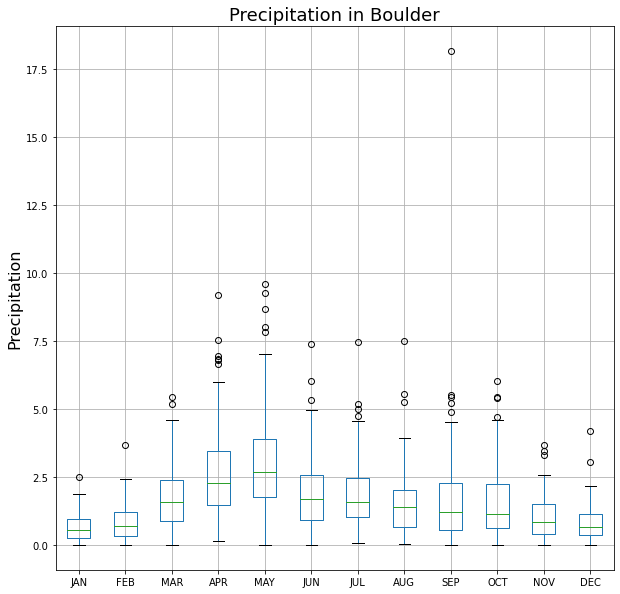

In [10]:
#reference: nb03
# Initialize figure 
fig = plt.figure(figsize=(10,10))

# Get axis object 
ax = fig.add_subplot(111)

#create boxplot
dfPrecip.boxplot(column=['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'])

ax.set_title('Precipitation in Boulder', fontsize=18)
ax.set_ylabel("Precipitation", fontsize=16)



**Part C:** Spring is the wet season in Boulder.   But what is Spring?

Atmospheric scientists love to group months seasonally, breaking the year into a Winter season including December, January, February; a Spring including March, April, and May; and so forth.

The solar year, however, says that Spring runs from near the end of March until near the end of June: let's round at the nearest month and say that it includes the months of April, May and June.

Generate a box plot with precipitation on the y-axis and the two possible monthly 'Spring' groupings (March-May versus April-June) as the x-axis.

Text(0, 0.5, 'Precipitation')

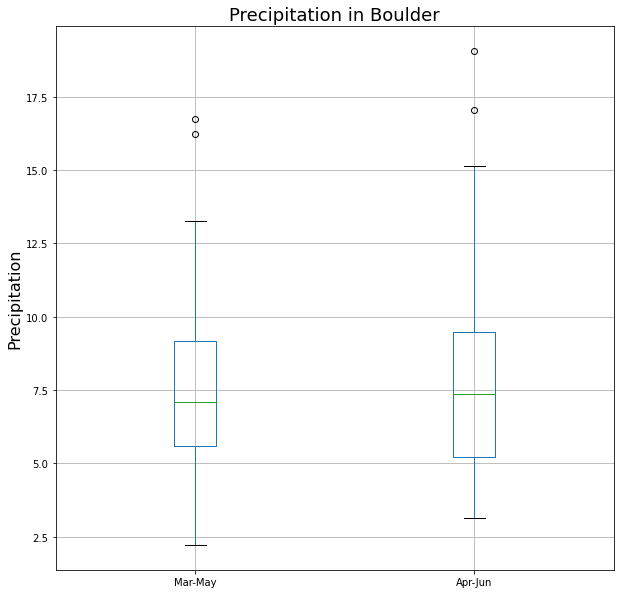

In [11]:
# I hit a wall with trying to figure out the group by function so
# my solution was to create two new columns, spring1 and spring2
# and sum the values from those specific months, and then use those cols
# for the boxplots

# Initialize figure 
fig = plt.figure(figsize=(10,10))

# Get axis object 
ax = fig.add_subplot(111)

dfPrecip['Mar-May'] = dfPrecip['MAR'] + dfPrecip['APR'] + dfPrecip['MAY']
dfPrecip['Apr-Jun'] = dfPrecip['APR'] + dfPrecip['MAY'] + dfPrecip['JUN']

dfPrecip.boxplot(column=['Mar-May','Apr-Jun'])
ax.set_title('Precipitation in Boulder', fontsize=18)
ax.set_ylabel("Precipitation", fontsize=16)

**Part D:** These might look pretty similar!  Highlight and comment on any differences by calculating the mean, standard deviation, and a Tukey five number summary of each classification of Spring.  Is there a reason here to favor one grouping over the other?

In [12]:
#use describe function to get the values
print("Statistics for Mar - May")
print(dfPrecip['Mar-May'].describe())

print("")
print("Statistics for Apr - Jun")
print(dfPrecip['Apr-Jun'].describe())


Statistics for Mar - May
count    120.00000
mean       7.51900
std        2.73733
min        2.21000
25%        5.59750
50%        7.10000
75%        9.17500
max       16.75000
Name: Mar-May, dtype: float64

Statistics for Apr - Jun
count    120.000000
mean       7.681917
std        2.939852
min        3.120000
25%        5.222500
50%        7.380000
75%        9.482500
max       19.070000
Name: Apr-Jun, dtype: float64


**Analysis of Boxplots**  
Looking at the two boxplots, it looks like the medians are pretty similar, but the spread is different. For Mar-May, there are two outliers, but the curve would be relatively normal. Apr-Jun on the other hand would be skewed right, with the outliers farther away.

**Part E:** Create a density histogram of the September precipitation.  Classify and describe this histogram, including discussion of any skewness, multimodality, or outliers.  Find the data point associated with September, 2013, and recreate your histogram with that value in a different color or otherwise clearly marked.

Text(0, 0.5, 'Frequency')

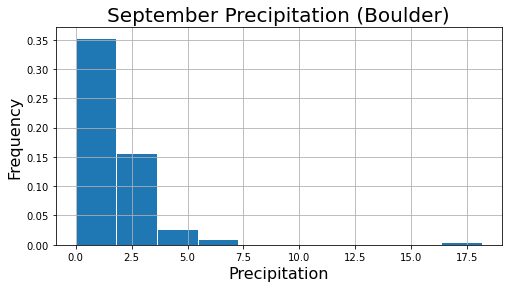

In [13]:
# Ref: nb03
fig, ax = plt.subplots(figsize=(8,4))
# Plot histogram with custom colors
mycolor =np.array([230,30,130])/255

dfPrecip.hist(column="SEP", ax =ax, edgecolor="white", density=True)
dfPrecip.hist

# Add a title
ax.set_title("September Precipitation (Boulder)", fontsize=20)

# Add axis labels 
ax.set_xlabel("Precipitation", fontsize=16)
ax.set_ylabel("Frequency", fontsize=16)


**Analysis of Histogram**  
Looking at the histogram, the data is clearly skewed right. The data seems to be relatively condensed (not too spread out), but the last point at the end is clearly an outlier.